In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

<h2>Carregando dados de treino</h2>

In [292]:
X_train = np.genfromtxt('datasets/UCI_HAR_Dataset/train/X_train.txt')

In [293]:
X_train.shape

(7352, 561)

In [294]:
y_train = np.genfromtxt('datasets/UCI_HAR_Dataset/train/y_train.txt')

In [295]:
y_train.shape

(7352,)

<h2>Carregando dados de teste</h2>

In [296]:
X_test = np.genfromtxt('datasets/UCI_HAR_Dataset/test/X_test.txt')

In [297]:
X_test.shape

(2947, 561)

In [298]:
y_test = np.genfromtxt('datasets/UCI_HAR_Dataset/test/y_test.txt')

In [299]:
y_test.shape

(2947,)

<h2>Histograma - Labels de treino</h2>

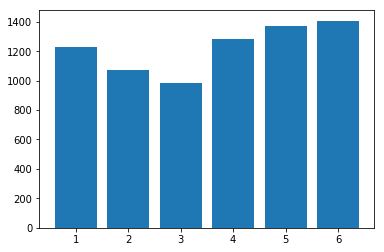

In [300]:
lbs, counts = np.unique(y_train, return_counts=True)
plt.bar(lbs, counts, align='center')
plt.gca().set_xticks(lbs)
plt.show()

In [301]:
def resample(data, labels):

    print('Original dataset shape {}'.format(Counter(labels)))

    X_res, y_res = RandomUnderSampler().fit_sample(data, labels)

    print('Resampled dataset shape {}'.format(Counter(y_res)))

    return X_res, y_res

Original dataset shape Counter({6.0: 1407, 5.0: 1374, 4.0: 1286, 1.0: 1226, 2.0: 1073, 3.0: 986})
Resampled dataset shape Counter({1.0: 986, 2.0: 986, 3.0: 986, 4.0: 986, 5.0: 986, 6.0: 986})


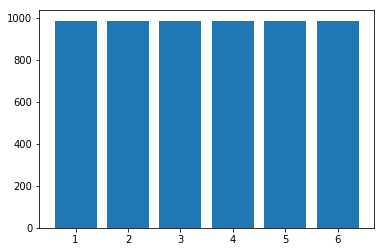

X_res shape (5916, 561)
y_res shape (5916,)


In [302]:
# Descomente para testar a função resample

X_res, y_res = resample(X_train, y_train)
lbs, counts = np.unique(y_res, return_counts=True)
plt.bar(lbs, counts, align='center')
plt.gca().set_xticks(lbs)
plt.show()

print('X_res shape {}'.format(X_res.shape))
print('y_res shape {}'.format(y_res.shape))

<h1>Treino e predição</h1>

In [303]:
def fit_and_predict(model, train_data, train_labels, test_data):
    model.fit(train_data, train_labels)
    return model.predict(test_data)

<h1>AdaBoost</h1>

In [304]:
adaBoostModel = AdaBoostClassifier()
adaBoost_result = fit_and_predict(adaBoostModel, X_train, y_train, X_test)

In [305]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(y_test, adaBoost_result)

0.53104852392263313

In [306]:
# Medidas de validação do modelo
print(metrics.classification_report(y_test, adaBoost_result))

             precision    recall  f1-score   support

        1.0       0.36      1.00      0.53       496
        2.0       0.00      0.00      0.00       471
        3.0       0.00      0.00      0.00       420
        4.0       0.00      0.00      0.00       491
        5.0       0.52      1.00      0.68       532
        6.0       1.00      1.00      1.00       537

avg / total       0.34      0.53      0.39      2947



/home/vagner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [307]:
# Matriz de confusão
print(pd.crosstab(y_test, adaBoost_result, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted   1.0   5.0  6.0   All
True                            
1.0         496     0    0   496
2.0         471     0    0   471
3.0         420     0    0   420
4.0           0   491    0   491
5.0           0   532    0   532
6.0           0     0  537   537
All        1387  1023  537  2947


<h1>Naive Bayes</h1>

In [308]:
nbModel = GaussianNB()
nb_result = fit_and_predict(nbModel, X_train, y_train, X_test)

In [309]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(y_test, nb_result)

0.77027485578554467

In [310]:
# Medidas de validação do modelo
print(metrics.classification_report(y_test, nb_result))

             precision    recall  f1-score   support

        1.0       0.82      0.84      0.83       496
        2.0       0.76      0.96      0.84       471
        3.0       0.83      0.61      0.70       420
        4.0       0.58      0.75      0.65       491
        5.0       0.80      0.86      0.83       532
        6.0       0.96      0.60      0.74       537

avg / total       0.79      0.77      0.77      2947



In [311]:
# Matriz de confusão
print(pd.crosstab(y_test, nb_result, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted  1.0  2.0  3.0  4.0  5.0  6.0   All
True                                         
1.0        416   38   42    0    0    0   496
2.0          9  451   11    0    0    0   471
3.0         80   83  257    0    0    0   420
4.0          0    7    0  368  111    5   491
5.0          0   15    0   54  455    8   532
6.0          0    3    0  211    0  323   537
All        505  597  310  633  566  336  2947


<h1>Decision Tree</h1>

In [312]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeResult = fit_and_predict(decisionTreeModel, X_train, y_train, X_test)

In [313]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(y_test, decisionTreeResult)

0.85680352901255519

In [314]:
# Medidas de validação do modelo
print(metrics.classification_report(y_test, decisionTreeResult))

             precision    recall  f1-score   support

        1.0       0.82      0.90      0.86       496
        2.0       0.82      0.77      0.79       471
        3.0       0.85      0.81      0.83       420
        4.0       0.84      0.77      0.80       491
        5.0       0.80      0.86      0.83       532
        6.0       1.00      1.00      1.00       537

avg / total       0.86      0.86      0.86      2947



In [315]:
# Matriz de confusão
print(pd.crosstab(y_test, decisionTreeResult, rownames=['True'], colnames=['Predicted'], margins=True))

Predicted  1.0  2.0  3.0  4.0  5.0  6.0   All
True                                         
1.0        446   26   24    0    0    0   496
2.0         74  363   34    0    0    0   471
3.0         25   55  340    0    0    0   420
4.0          0    0    0  379  112    0   491
5.0          0    0    0   72  460    0   532
6.0          0    0    0    0    0  537   537
All        545  444  398  451  572  537  2947
